In [1]:
%matplotlib inline 
import os
import math
import tqdm
import tqdm.auto
tqdm.tqdm = tqdm.auto.tqdm

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# import tensorflow_datasets as tfds

# Data Loading

In [2]:
_URL = "https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file(
    origin=_URL,
    fname="cats_dogs_dataset.zip"
)
print("Local directory: ", zip_dir)

68616192/68606236 [==============================] - 34s 0us/step
Local directory:  /Users/vuong/.keras/datasets/cats_dogs_dataset.zip


In [3]:
zip_dir_target = os.path.dirname(zip_dir)
print(zip_dir)
print(zip_dir_target)
!unzip $zip_dir -d $zip_dir_target

/Users/vuong/.keras/datasets/cats_dogs_dataset.zip
/Users/vuong/.keras/datasets
Archive:  /Users/vuong/.keras/datasets/cats_dogs_dataset.zip
   creating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/vectorize.py  
   creating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/
   creating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/
   creating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2127.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2126.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2125.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2124.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2123.jpg  
  

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2023.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2022.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2021.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2020.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2019.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2018.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2017.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2016.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2015.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2014.jpg  
  inflating: /Users/vuong/.keras/dataset

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2135.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2134.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2133.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2132.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2131.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2130.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2129.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2128.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2383.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2382.jpg  
  inflating: /Users/vuong/.keras/dataset

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2473.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2472.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2471.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2470.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2469.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2468.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2467.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2466.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2465.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs/dog.2464.jpg  
  inflating: /Users/vuong/.keras/dataset

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2051.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2050.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2049.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2048.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2047.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2046.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2045.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2044.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2043.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2042.jpg  
  inflating: /Users/vuong/.keras/dataset

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2152.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2151.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2150.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2149.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2148.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2147.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2146.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2145.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2144.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2143.jpg  
  inflating: /Users/vuong/.keras/dataset

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2477.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2476.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2475.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2474.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2473.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2472.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2471.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2470.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2469.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats/cat.2468.jpg  
  inflating: /Users/vuong/.keras/dataset

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.56.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.55.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.54.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.53.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.52.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.51.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.50.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.49.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.48.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.47.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.46.jpg  
  inflating: /Users/v

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.158.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.157.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.156.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.155.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.154.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.153.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.152.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.151.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.150.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.149.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.148.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.257.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.256.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.511.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.510.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.509.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.508.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.507.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.506.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.505.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.504.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.503.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.387.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.386.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.385.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.384.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.639.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.638.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.637.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.636.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.635.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.634.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.633.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.536.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.535.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.534.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.533.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.532.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.531.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.530.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.529.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.528.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.527.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.526.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.686.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.685.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.684.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.683.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.682.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.681.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.680.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.679.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.678.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.677.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.676.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.815.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.814.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.813.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.812.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.811.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.810.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.809.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.808.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.807.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.806.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.805.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.902.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.901.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.900.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.899.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.898.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.897.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs/dog.896.jpg  
   creating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.127.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.126.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.125.jpg  
  inflating: /Users/vuo

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.29.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.28.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.27.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.26.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.25.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.24.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.23.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.22.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.21.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.20.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.19.jpg  
  inflating: /Users/v

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.149.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.148.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.147.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.146.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.145.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.144.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.143.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.142.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.141.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.140.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.139.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.508.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.507.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.506.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.505.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.504.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.503.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.502.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.501.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.500.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.499.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.498.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.598.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.597.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.596.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.595.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.594.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.593.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.592.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.591.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.590.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.589.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.588.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.696.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.695.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.694.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.693.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.692.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.691.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.690.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.689.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.688.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.687.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.686.jpg  
  inflatin

  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.787.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.786.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.785.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.784.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.783.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.782.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.781.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.780.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.779.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.778.jpg  
  inflating: /Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats/cat.777.jpg  
  inflatin

In [4]:
!find /Users/vuong/.keras/datasets -type d -print

/Users/vuong/.keras/datasets
/Users/vuong/.keras/datasets/cats_and_dogs_filtered
/Users/vuong/.keras/datasets/cats_and_dogs_filtered/train
/Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/dogs
/Users/vuong/.keras/datasets/cats_and_dogs_filtered/train/cats
/Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation
/Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/Users/vuong/.keras/datasets/cats_and_dogs_filtered/validation/cats


In [5]:
cats_tr = os.listdir(f'{zip_dir_target}/cats_and_dogs_filtered/train/cats')
dogs_tr = os.listdir(f'{zip_dir_target}/cats_and_dogs_filtered/train/dogs')
print('Total training cat images:', len(cats_tr))
print('Total training dog images:', len(dogs_tr))

cats_val = os.listdir(f'{zip_dir_target}/cats_and_dogs_filtered/validation/cats')
dogs_val = os.listdir(f'{zip_dir_target}/cats_and_dogs_filtered/validation/dogs')
print('Total validation cat images:', len(cats_val))
print('Total validation dog images:', len(dogs_val))
print("--")

total_tr = len(cats_tr)+len(dogs_tr)
total_val = len(cats_val)+len(dogs_val)
print("Total training images:", total_tr)
print("Total validation images:", total_val)

Total training cat images: 1000
Total training dog images: 1000
Total validation cat images: 500
Total validation dog images: 500
--
Total training images: 2000
Total validation images: 1000


# Data Preparation

Generates a tf.data.Dataset from image files in a directory.



In [6]:
IMAGE_WIDTH = 150
IMAGE_HEIGHT = 150

ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    f'{zip_dir_target}/cats_and_dogs_filtered/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=total_tr,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    f'{zip_dir_target}/cats_and_dogs_filtered/validation',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=total_val,
    image_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 2000 files belonging to 2 classes.
Metal device set to: AMD Radeon Pro 5300M
Found 1000 files belonging to 2 classes.


2021-11-01 20:11:21.634083: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-01 20:11:21.635151: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-01 20:11:21.635534: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [7]:
print("Class names: ", ds_train.class_names)
class_names = ds_train.class_names

Class names:  ['cats', 'dogs']


In [8]:
for images, labels in ds_train.take(1):
    print("First batch of training data: ", images.shape)
for images, labels in ds_test.take(1):
    print("First batch of testing data: ", images.shape)

2021-11-01 20:11:22.730502: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


First batch of training data:  (2000, 150, 150, 3)
First batch of testing data:  (1000, 150, 150, 3)


## Convert Image Data to Animal object

In [9]:
class Animal:
    def __init__(self, image, label):
        self.image = image
        self.label = label

    def normalize(self):
        self.image = self.image / 255
    
    def visualize(self, plt, class_names=[], original=False):
        if original:
            plt.imshow(self.image.astype('uint8'))
        else:
            plt.imshow(self.image)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        if not class_names:
            plt.xlabel(self.label)
        else:
            plt.xlabel(class_names[self.label])

In [10]:
def generate_dataset():
    animals_train = []
    animals_test = []

    for images, labels in ds_train.take(1):
        for i in range(total_tr):
            image = images[i].numpy()
            label = np.argmax(labels[i].numpy())
            animals_train.append(Animal(image, label))

    for images, labels in ds_test.take(1):
        for i in range(total_val):
            image = images[i].numpy()
            label = np.argmax(labels[i].numpy())
            animals_test.append(Animal(image, label))

    print("Total training animals:", len(animals_train))
    print("Total training animals:", len(animals_test))
    
    return animals_train, animals_test

animals_train, animals_test = generate_dataset()

Total training animals: 2000
Total training animals: 1000


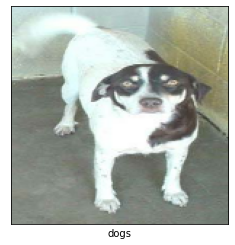

In [11]:
# Visualize the first animal in the training data
animals_train[0].visualize(plt, class_names=['cats', 'dogs'], original=True)
plt.show()

## Normalization

Rescale the tensors from values between 0 and 255 to values between 0 and 1, as neural networks prefer to deal with small input values.

In [12]:
# Normalizing
animals_train_nor, animals_test_nor = generate_dataset()

for i in range(len(animals_train_nor)):
    animals_train_nor[i].normalize()

for i in range(len(animals_test_nor)):
    animals_test_nor[i].normalize()

Total training animals: 2000
Total training animals: 1000


In [13]:
# Print the first animal in the training data after normalization
print(animals_train_nor[0].image)

[[[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]
  [0.99215686 0.99215686 0.99215686]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.9953595  0.9953595  0.9953595 ]
  [0.9953595  0.9953595  0.9953595 ]
  [0.9953595  0.9953595  0.9953595 ]]

 ...

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]


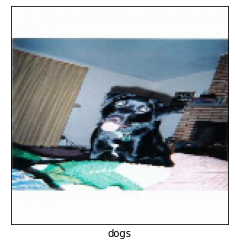

In [14]:
# Visualize the first animal in the training data
animals_train_nor[0].visualize(plt, class_names=['cats', 'dogs'])
plt.show()

## Create a Dataset in TensorFlow

We have a numpy array and we want to pass it to TensorFlow.


In [15]:
print("Total training images:", len(animals_train_nor))
print("Total validation images:", len(animals_test_nor))

Total training images: 2000
Total validation images: 1000


In [16]:
X_train, y_train = [], []
X_test, y_test = [], []

for animal in animals_train_nor:
    X_train.append(animal.image)
    y_train.append(animal.label)

for animal in animals_test_nor:
    X_test.append(animal.image)
    y_test.append(animal.label)

print("Total training images:", len(X_train))
print("Total training labels:", len(y_train))
print("Total validation images:", len(X_test))
print("Total validation labels:", len(y_test))

Total training images: 2000
Total training labels: 2000
Total validation images: 1000
Total validation labels: 1000


# Visualizing Training images

We can visualize our training images by getting a batch of images from the training dataset, and then plotting a few of them using matplotlib.

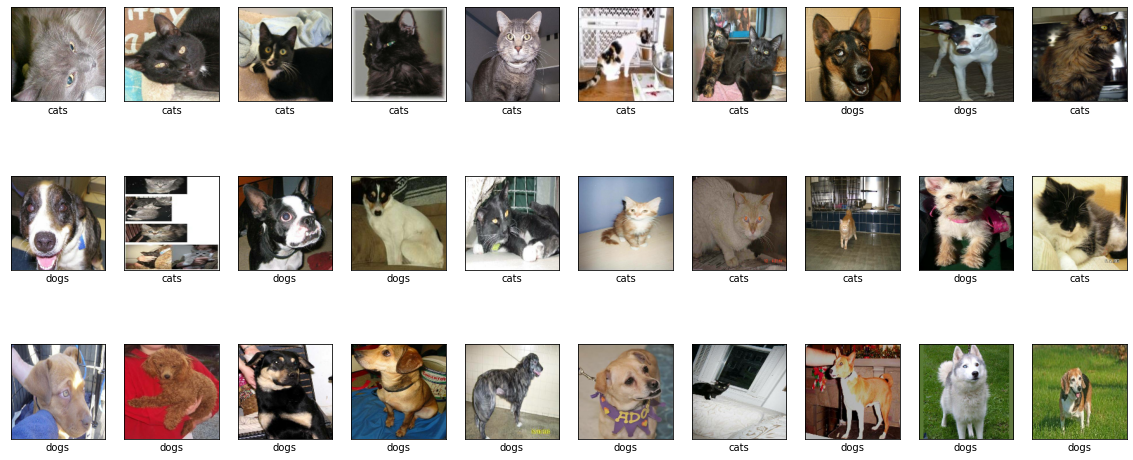

In [17]:
import random
random_list = random.sample(range(0, 2000), 30)

def show_image(image, label):
    plt.imshow(X=image)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.xlabel(label)

plt.figure(figsize=(20,15))
idx=0
for i in random_list:
    plt.subplot(5, 10, idx+1)
    image = X_train[i]  # For normalize only
    label = class_names[y_train[i]]
    show_image(image, label)
    idx+=1
plt.show()

# Baseline Model

In [18]:
def baseline_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu, padding="same", input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, padding="same"),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding="same"),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
        tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
    ])
    return model

## Train the model
It's time we train our network.

In [19]:
EPOCHS = 100
BATCH_SIZE = 100

training_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_train), np.array(y_train)))
testing_dataset = tf.data.Dataset.from_tensor_slices((np.array(X_test), np.array(y_test)))

training_dataset = training_dataset.batch(batch_size=BATCH_SIZE)
testing_dataset = testing_dataset.batch(batch_size=BATCH_SIZE)

print("Total training dataset:", len(list(training_dataset)))
print("Total testing dataset:", len(list(testing_dataset)))

Total training dataset: 20
Total testing dataset: 10


In [20]:
model = baseline_model()

model.summary()

model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
)

history = model.fit(
    training_dataset,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_data=testing_dataset,
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 175232)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               8

2021-11-01 20:12:10.724987: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 1.5490 - sparse_categorical_accuracy: 0.5090

2021-11-01 20:12:20.751950: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 12s 461ms/step - loss: 1.5490 - sparse_categorical_accuracy: 0.5090 - val_loss: 0.6802 - val_sparse_categorical_accuracy: 0.5060
Epoch 2/100
20/20 [==============================] - 9s 453ms/step - loss: 0.6798 - sparse_categorical_accuracy: 0.5855 - val_loss: 0.6600 - val_sparse_categorical_accuracy: 0.5750
Epoch 3/100
20/20 [==============================] - 9s 453ms/step - loss: 0.6424 - sparse_categorical_accuracy: 0.6630 - val_loss: 0.6577 - val_sparse_categorical_accuracy: 0.6290
Epoch 4/100
20/20 [==============================] - 9s 454ms/step - loss: 0.5957 - sparse_categorical_accuracy: 0.6765 - val_loss: 0.6384 - val_sparse_categorical_accuracy: 0.6400
Epoch 5/100
20/20 [==============================] - 9s 462ms/step - loss: 0.5727 - sparse_categorical_accuracy: 0.7030 - val_loss: 0.6263 - val_sparse_categorical_accuracy: 0.6520
Epoch 6/100
20/20 [==============================] - 9s 467ms/step - loss: 0.5348 - sparse_categorical_acc

Epoch 46/100
20/20 [==============================] - 9s 456ms/step - loss: 6.8764e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0407 - val_sparse_categorical_accuracy: 0.6460
Epoch 47/100
20/20 [==============================] - 9s 456ms/step - loss: 6.4863e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0554 - val_sparse_categorical_accuracy: 0.6470
Epoch 48/100
20/20 [==============================] - 9s 455ms/step - loss: 6.1319e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0693 - val_sparse_categorical_accuracy: 0.6460
Epoch 49/100
20/20 [==============================] - 9s 456ms/step - loss: 5.8099e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0826 - val_sparse_categorical_accuracy: 0.6440
Epoch 50/100
20/20 [==============================] - 9s 460ms/step - loss: 5.5137e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.0957 - val_sparse_categorical_accuracy: 0.6440
Epoch 51/100
20/20 [==============================] - 9s 457ms/step - 

Epoch 90/100
20/20 [==============================] - 10s 512ms/step - loss: 1.3864e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.4559 - val_sparse_categorical_accuracy: 0.6540
Epoch 91/100
20/20 [==============================] - 10s 509ms/step - loss: 1.3518e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.4625 - val_sparse_categorical_accuracy: 0.6540
Epoch 92/100
20/20 [==============================] - 10s 506ms/step - loss: 1.3188e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.4690 - val_sparse_categorical_accuracy: 0.6550
Epoch 93/100
20/20 [==============================] - 10s 515ms/step - loss: 1.2873e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.4752 - val_sparse_categorical_accuracy: 0.6550
Epoch 94/100
20/20 [==============================] - 10s 521ms/step - loss: 1.2563e-05 - sparse_categorical_accuracy: 1.0000 - val_loss: 3.4815 - val_sparse_categorical_accuracy: 0.6550
Epoch 95/100
20/20 [==============================] - 11s 541ms/s

## Visualizing results of the training
We'll now visualize the results we get after training our network.

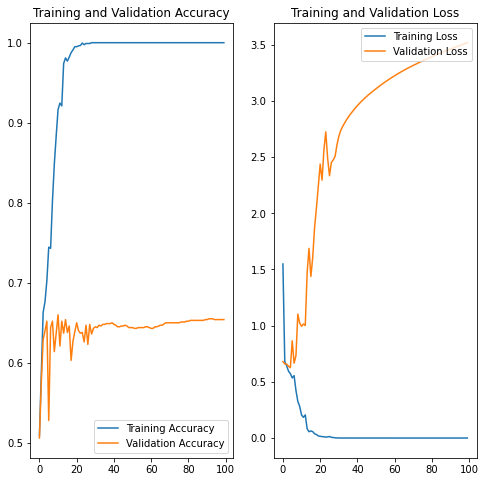

In [24]:
def visualize_model(history, epochs):
    acc = history.history['sparse_categorical_accuracy']
    val_acc = history.history['val_sparse_categorical_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

visualize_model(history, EPOCHS)

# Fine Tuning

## Data augmentation

Data augmentation takes the approach of generating additional training images by augmenting them using random transformations that yield believable-looking images. This helps expose the model to more aspects of the data, prevent overfitting and generalize better.



In the cell below, use Keras to create a transformation that applies a random horizontal/vertical flip, a random 90 degree rotation, a random zoom of up to 150%, and a range for randomly picking a brightness shift value from.

In [63]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

EPOCHS = 100
BATCH_SIZE = 100

In [64]:
# Re-generate data
animals_train, animals_test = generate_dataset()

X_train, y_train = [], []
X_test, y_test = [], []

for animal in animals_train:
    X_train.append(animal.image)
    y_train.append(animal.label)

for animal in animals_test:
    X_test.append(animal.image)
    y_test.append(animal.label)

print("Total training images:", len(X_train))
print("Total training labels:", len(y_train))
print("Total validation images:", len(X_test))
print("Total validation labels:", len(y_test))

Total training animals: 2000
Total training animals: 1000
Total training images: 2000
Total training labels: 2000
Total validation images: 1000
Total validation labels: 1000


Takes data and label arrays, then generates batches of augmented data.

In [65]:
def get_data_from_numpy():
    training_data_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )
    train_data_gen = training_data_generator.flow(x=np.array(X_train), 
                                                  y=np.array(y_train), 
                                                  batch_size=BATCH_SIZE, 
                                                  shuffle=True)
    
    val_data_generator = ImageDataGenerator(rescale=1./255)
    val_data_gen = val_data_generator.flow(x=np.array(X_test), 
                                           y=np.array(y_test))
    
    return train_data_gen, val_data_gen

Takes the path to a directory and generates batches of augmented data.

In [76]:
def get_data_from_directory():
    training_data_generator = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode="nearest"
    )
    train_data_gen = training_data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                         directory=f'{zip_dir_target}/cats_and_dogs_filtered/train',
                                                         shuffle=True,
                                                         target_size=(150,150),
                                                         class_mode='binary')

    val_data_generator = ImageDataGenerator(rescale=1./255)
    val_data_gen = val_data_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory=f'{zip_dir_target}/cats_and_dogs_filtered/validation',
                                                     target_size=(150,150),
                                                     class_mode='binary')
    return train_data_gen, val_data_gen

Let's visualize how a single image would look like different times, when we pass these augmentations randomly to our dataset.

In [67]:
def plot_images_from_image_generators(img_generator):
    fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
    for i in range(5):
        img, label = img_generator.next()
        ax[i].imshow(img[0])
        ax[i].axis("off")

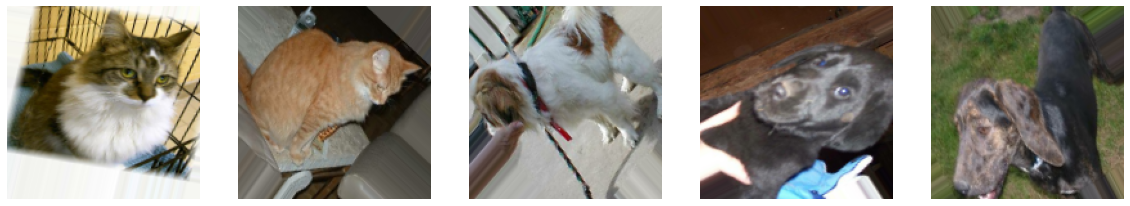

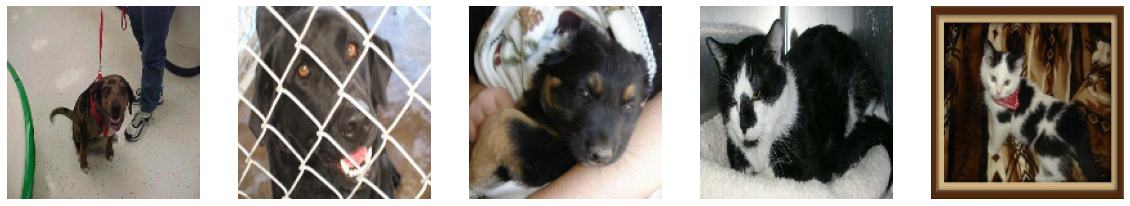

In [77]:
train_data_gen, val_data_gen = get_data_from_numpy()

plot_images_from_image_generators(train_data_gen)
plot_images_from_image_generators(val_data_gen)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


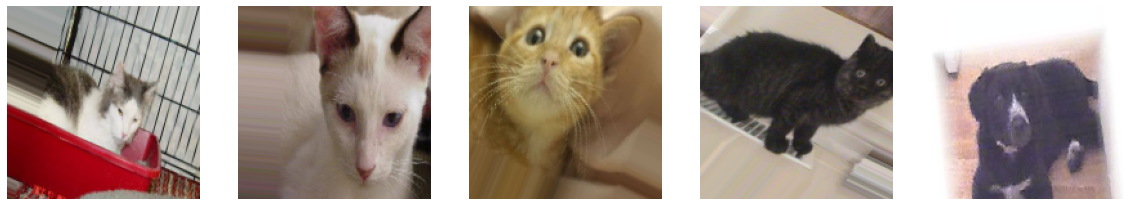

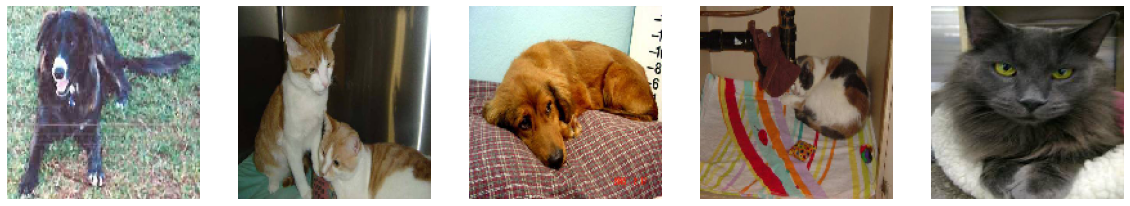

In [78]:
train_data_gen, val_data_gen = get_data_from_directory()

plot_images_from_image_generators(train_data_gen)
plot_images_from_image_generators(val_data_gen)

### Model with Data Augmentation

In [79]:
def get_model_with_data_augmentation():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation=tf.nn.relu, padding="valid", input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation=tf.nn.relu, padding="valid"),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding="valid"),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation=tf.nn.relu, padding="valid"),
        tf.keras.layers.MaxPooling2D(pool_size=2, strides=2),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512, activation=tf.nn.relu),
        tf.keras.layers.Dense(units=2, activation=tf.nn.softmax)
    ])
    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss=tf.keras.losses.sparse_categorical_crossentropy,
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
    )
    return model

In [80]:
model_1 = get_model_with_data_augmentation()
model_1.summary()

train_data_gen, val_data_gen = get_data_from_numpy()
history_1 = model_1.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_tr / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_42 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 15, 15, 128)     

2021-11-01 22:16:48.917545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - ETA: 0s - loss: 0.7398 - sparse_categorical_accuracy: 0.5130

2021-11-01 22:16:57.609121: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


20/20 [==============================] - 9s 434ms/step - loss: 0.7398 - sparse_categorical_accuracy: 0.5130 - val_loss: 0.7015 - val_sparse_categorical_accuracy: 0.4531
Epoch 2/100
20/20 [==============================] - 9s 442ms/step - loss: 0.6927 - sparse_categorical_accuracy: 0.5340 - val_loss: 0.6851 - val_sparse_categorical_accuracy: 0.4969
Epoch 3/100
20/20 [==============================] - 9s 446ms/step - loss: 0.6744 - sparse_categorical_accuracy: 0.5770 - val_loss: 0.6290 - val_sparse_categorical_accuracy: 0.6656
Epoch 4/100
20/20 [==============================] - 9s 427ms/step - loss: 0.6859 - sparse_categorical_accuracy: 0.5500 - val_loss: 0.6858 - val_sparse_categorical_accuracy: 0.5531
Epoch 5/100
20/20 [==============================] - 9s 425ms/step - loss: 0.6776 - sparse_categorical_accuracy: 0.5785 - val_loss: 0.6683 - val_sparse_categorical_accuracy: 0.6250
Epoch 6/100
20/20 [==============================] - 9s 425ms/step - loss: 0.6480 - sparse_categorical_accu

Epoch 46/100
20/20 [==============================] - 11s 515ms/step - loss: 0.5327 - sparse_categorical_accuracy: 0.7355 - val_loss: 0.5948 - val_sparse_categorical_accuracy: 0.6813
Epoch 47/100
20/20 [==============================] - 11s 527ms/step - loss: 0.5367 - sparse_categorical_accuracy: 0.7305 - val_loss: 0.5336 - val_sparse_categorical_accuracy: 0.7312
Epoch 48/100
20/20 [==============================] - 12s 562ms/step - loss: 0.5323 - sparse_categorical_accuracy: 0.7235 - val_loss: 0.5853 - val_sparse_categorical_accuracy: 0.6938
Epoch 49/100
20/20 [==============================] - 12s 573ms/step - loss: 0.5436 - sparse_categorical_accuracy: 0.7250 - val_loss: 0.5360 - val_sparse_categorical_accuracy: 0.7188
Epoch 50/100
20/20 [==============================] - 12s 565ms/step - loss: 0.5168 - sparse_categorical_accuracy: 0.7420 - val_loss: 0.4877 - val_sparse_categorical_accuracy: 0.7406
Epoch 51/100
20/20 [==============================] - 12s 557ms/step - loss: 0.5177 -

Epoch 91/100
20/20 [==============================] - 11s 548ms/step - loss: 0.4421 - sparse_categorical_accuracy: 0.7910 - val_loss: 0.5662 - val_sparse_categorical_accuracy: 0.7250
Epoch 92/100
20/20 [==============================] - 11s 550ms/step - loss: 0.4609 - sparse_categorical_accuracy: 0.7825 - val_loss: 0.5359 - val_sparse_categorical_accuracy: 0.7312
Epoch 93/100
20/20 [==============================] - 12s 569ms/step - loss: 0.4681 - sparse_categorical_accuracy: 0.7750 - val_loss: 0.5564 - val_sparse_categorical_accuracy: 0.7344
Epoch 94/100
20/20 [==============================] - 12s 576ms/step - loss: 0.4402 - sparse_categorical_accuracy: 0.7915 - val_loss: 0.4574 - val_sparse_categorical_accuracy: 0.7750
Epoch 95/100
20/20 [==============================] - 12s 587ms/step - loss: 0.4392 - sparse_categorical_accuracy: 0.7875 - val_loss: 0.4968 - val_sparse_categorical_accuracy: 0.7625
Epoch 96/100
20/20 [==============================] - 12s 596ms/step - loss: 0.4175 -

### Visualizing the training model

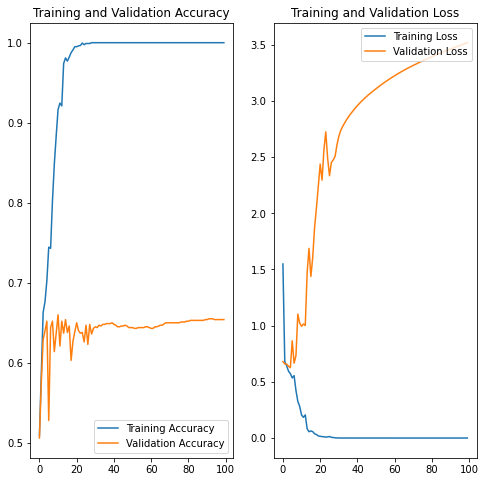

In [73]:
visualize_model(history, EPOCHS)

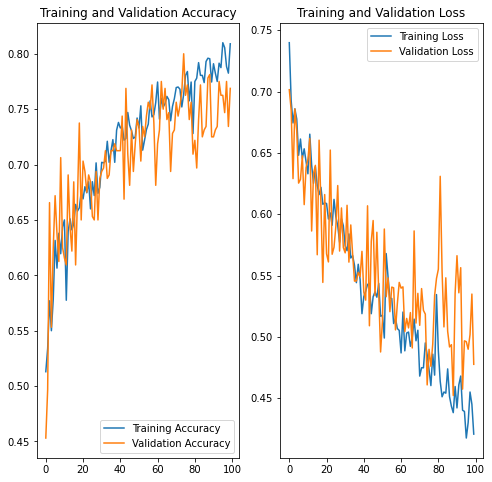

In [81]:
visualize_model(history_1, EPOCHS)

# Predict Images

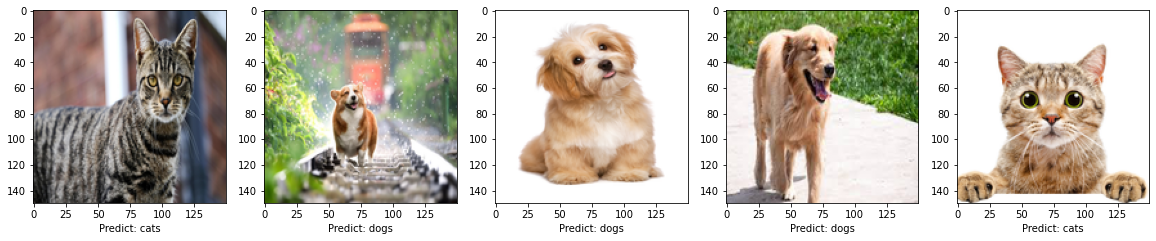

In [121]:
def image_url_to_numpy_array_skimage(url,format=None):
    from skimage import io
    from PIL import Image
    image = io.imread(url)
    image = np.asarray(image, dtype="uint8")
    if format=='BGR' :
        ## return BGR format array
        img_arr = image[...,[2,1,0]]
    else:
        img_arr = image
    return np.array(Image.fromarray(img_arr).resize((150, 150), Image.ANTIALIAS))/255


fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(20,20))
images_dir = ["data/sample_00.jpg", "data/sample_01.jpg", "data/sample_02.jpg", "data/sample_03.jpg", "data/sample_04.jpg"]
for i in range(5):
    sample = image_url_to_numpy_array_skimage(images_dir[i])
    ax[i].imshow(sample)
    ax[i].set_xlabel(f'Predict: {class_names[np.argmax(model_1.predict(np.array([sample])))]}') 
